In [24]:
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math  #<......necesario
Samples = 201

In [25]:
#Tamaño de un bin = (max(x)-min(x)) * (2*(x.75-x.25)^-1) * n^{1/3}

#x.75 y x.25 son los cuartiles de la mustra, es decir los valores que acumulan .25 y .75 de probabilidad
#suponindo que tomamos a todos los elementos de la matriz con igual probabilidad 1/(#elementos)
#los cuartiles surgen de ordenar los elementos 
#y tomar el que deje 1/4 de probabilidad(#elementos) a la derecha = x25
#y el que deje 1/4 de probabilidad(#elementos) a la izquierda = x75

In [87]:
def calculate_bin_max_min(matrix_sujeto):
    cant_electrodos = matrix_sujeto.shape[1]
    x25 = np.zeros(cant_electrodos)
    x75 = np.zeros(cant_electrodos)
    maximum = np.zeros(cant_electrodos)
    minimum = np.zeros(cant_electrodos)
    
    for i in range(0,cant_electrodos):
        electrodo_actual = np.copy(matrix_sujeto[:, i, :])
        np.sort(electrodo_actual, axis=None)

        maximum[i] = electrodo_actual.max()
        minimum[i] = electrodo_actual.min()
        x75[i] = np.percentile(electrodo_actual, 75)
        x25[i] = np.percentile(electrodo_actual, 25)
        
    return np.max(maximum), np.min(minimum), np.mean(x75), np.mean(x25)

In [88]:
def calculate_tbin(maximum, minimum, x75, x25, matrix_shape):
    n_instances = matrix_shape[0] * matrix_shape[2]
    return 2 * (x75-x25) / (math.pow(n_instances,1.0/3))

In [89]:
# numpy arange step
def calculate_probabilities(electrodo_matrix, max_val, min_val, t_bin):
    bins = np.arange(min_val, max_val, t_bin)
    acum = np.zeros(bins.shape[0] - 1)
    for i in range(0, electrodo_matrix.shape[0]):
        hist, _ = np.histogram(electrodo_matrix[i,:], bins=bins)
        acum = acum + hist
    return (acum / float(electrodo_matrix.shape[0] * electrodo_matrix.shape[1]))

In [90]:
def calculate_entropia(proba_x, cant_epochs, cant_muestras):
    res=0
    for i in range(0,len(proba_x)):
        if proba_x[i] > 0:
            res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras)),10)
    return -res

In [91]:
def entropias_electrodos_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
    t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
    
    entropia_por_electrodo = []
    for i in range(cant_electrodos):
        electrodo_i_matrix = matrix_p01[:, i, :]
        #t_bin = calculate_tbin(maximum_values[i], minimum_values[i], x75_values[i], x25_values[i])
        probabilities = calculate_probabilities(electrodo_i_matrix, max_value, min_value, t_bin)
        entropia_por_electrodo.append(calculate_entropia(probabilities, cant_epochs, cant_muestras))
    return entropia_por_electrodo

In [92]:
filename_P = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [93]:
res_P = entropias_electrodos_por_sujeto(filename_P)

In [94]:
np.var(res_P)

3.3982569448974626e-13

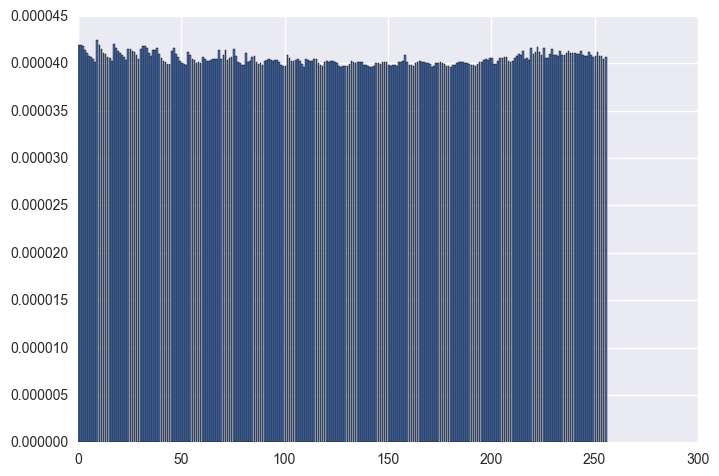

In [95]:
plt.bar(range(len(res_P[:256])), res_P[:256])
plt.show()

In [96]:
filename_S = "/Users/lmatayoshi/Desktop/EEG/S01.mat"

In [97]:
res_S = entropias_electrodos_por_sujeto(filename_S)

In [98]:
np.var(res_S)

1.6497097150901344e-12

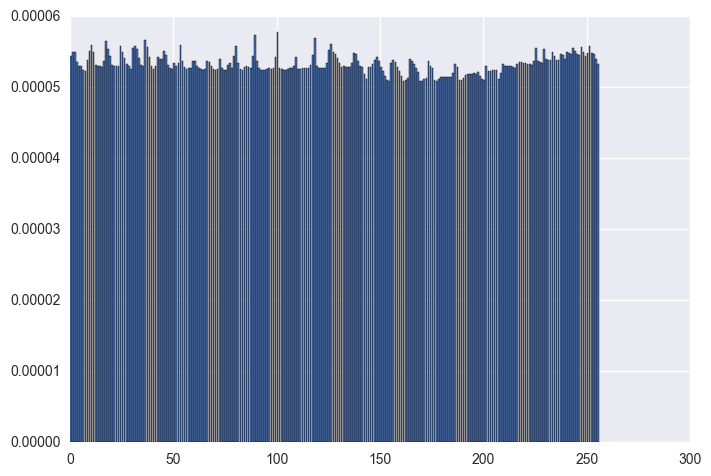

In [99]:
plt.bar(range(len(res_S[:256])), res_S[:256])
plt.show()

In [81]:
import itertools
def findsubsets(S,m):
    return itertools.combinations(S, m)

In [82]:
electrodes = [8, 44, 80, 131, 185]

In [83]:
res = findsubsets(electrodes,2)

In [85]:
list(res)

[(8, 44),
 (8, 80),
 (8, 131),
 (8, 185),
 (44, 80),
 (44, 131),
 (44, 185),
 (80, 131),
 (80, 185),
 (131, 185)]

In [74]:
[list(x) for x in res]

[[8, 185],
 [8, 131],
 [131, 185],
 [8, 44],
 [80, 131],
 [44, 185],
 [44, 80],
 [80, 185],
 [8, 80],
 [44, 131]]

In [86]:
#electrodos tomados de a 2
electrodes = [8, 44, 80, 131, 185]
electrodos_tomados_de_a_2 = list(itertools.combinations(electrodes, 2))
electrodos_tomados_de_a_2 = [list(e) for e in electrodos_tomados_de_a_2]
electrodos_tomados_de_a_2

[[8, 44],
 [8, 80],
 [8, 131],
 [8, 185],
 [44, 80],
 [44, 131],
 [44, 185],
 [80, 131],
 [80, 185],
 [131, 185]]

In [101]:
for (e1, e2) in electrodos_tomados_de_a_2:
    print e1

8
8
8
8
44
44
44
80
80
131


# Entropía conjunta

In [193]:
def entropia_conjunta_por_sujeto(filename):
    p01 = sio.loadmat(filename)
    matrix_p01 = p01['data']
    cant_epochs = matrix_p01.shape[0]
    cant_electrodos = matrix_p01.shape[1]
    cant_muestras = matrix_p01.shape[2] 
    
    max_value, min_value, x75, x25 = calculate_bin_max_min(matrix_p01)
    t_bin = calculate_tbin(max_value, min_value, x75, x25, matrix_p01.shape)
    
    electrodes = [8, 44, 80, 131, 185]
    electrodos_tomados_de_a_2 = list(itertools.combinations(electrodes, 2))
    electrodos_tomados_de_a_2 = [list(e) for e in electrodos_tomados_de_a_2]
    
    res = []
    for (e1, e2) in electrodos_tomados_de_a_2:
        probabilities = calculate_joint_probabilities(matrix_p01[:, e1, :], matrix_p01[:, e2, :], max_value, min_value, t_bin)
        res.append(calculate_entropia_conjunta(probabilities, cant_muestras))
    return res

In [194]:
def first_matching_index(bins, value):
    for i, item in enumerate(bins):
        if item <= value and bins[i+1] > value:
            return i
            break
    return -1

In [195]:
def calculate_joint_probabilities(m1, m2, max_value, min_value, t_bin):
    m1 = np.mean(m1, axis=0)
    m2 = np.mean(m2, axis=0)
    n_instances = m1.shape[0]
    bins = np.arange(min_value, max_value, t_bin)
    res = np.zeros(((bins.shape[0] - 1), (bins.shape[0] - 1)))
    for i in range(m1.shape[0]):
        f = first_matching_index(bins, m1[i])
        c = first_matching_index(bins, m2[i])
        res[f, c] = res[f,c] + 1
    return res/n_instances

In [196]:
def calculate_entropia_conjunta(probabilities, cant_muestras):
    res = 0
    for i in range(0, probabilities.shape[0]):
        for j in range(0, probabilities.shape[1]):
            if probabilities[i][j] > 0:
                res += probabilities[i][j] * math.log(probabilities[i][j], 2)
    return -res

In [202]:
filename_S = "/Users/lmatayoshi/Desktop/EEG/S01.mat"
filename_P = "/Users/lmatayoshi/Desktop/EEG/P01.mat"

In [203]:
res_S = entropia_conjunta_por_sujeto(filename_S)

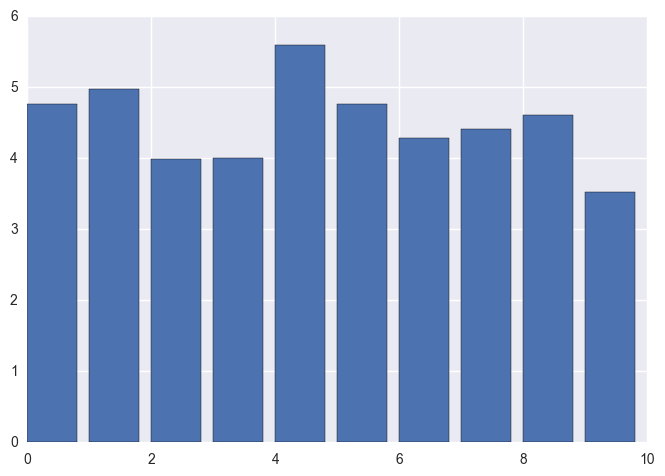

In [204]:
plt.bar(range(len(res_S)), res_S)
plt.show()

In [206]:
res_P = entropia_conjunta_por_sujeto(filename_P)

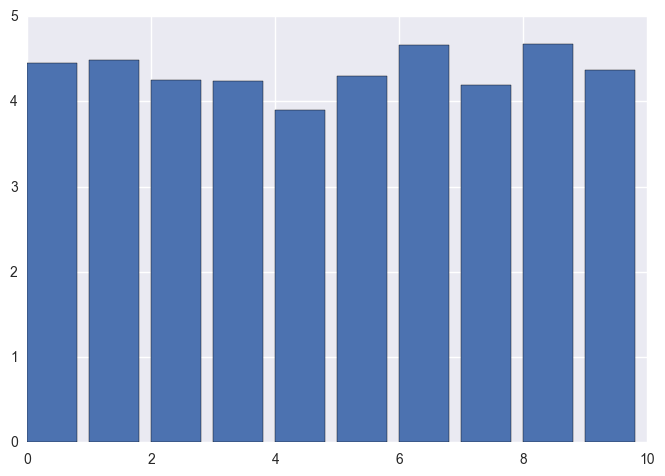

In [207]:
plt.bar(range(len(res_P)), res_P)
plt.show()